model 1  TF-IDF

Class distribution (Normal vs Alert):
0    10048
1    10040
Name: count, dtype: int64
Training Accuracy: 0.9868
Accuracy: 0.9846
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2057
           1       0.99      0.98      0.98      1961

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018

Confusion Matrix:
[[2036   21]
 [  41 1920]]
ROC-AUC Score: 0.9978


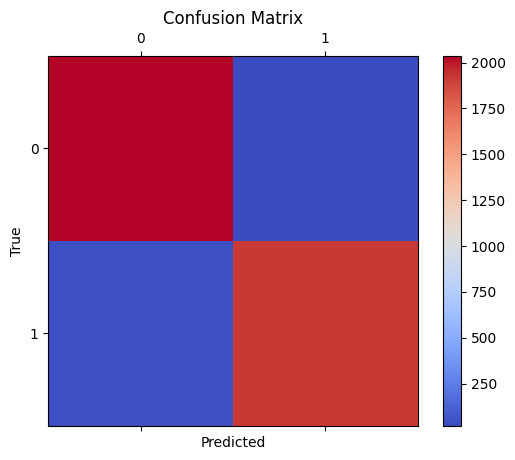

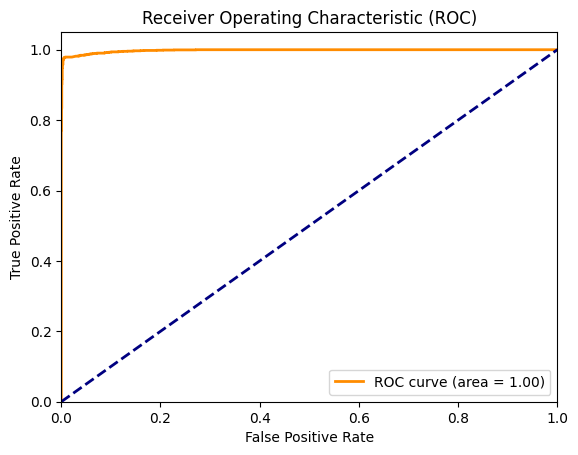

Model and vectorizer saved!


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Load the datasets
elderly_health_data = pd.read_csv(r'/content/elderly_health_dataset.csv')
emergency_data = pd.read_csv(r'/content/emergency_dataset.csv')

# Step 2: Extract the text and labels from both datasets
elderly_health_texts = elderly_health_data['text'].tolist()
elderly_health_labels = elderly_health_data['label'].tolist()

emergency_texts = emergency_data['text'].tolist()
emergency_labels = emergency_data['label'].tolist()

# Step 3: Combine both datasets
texts = elderly_health_texts + emergency_texts
labels = elderly_health_labels + emergency_labels

# Check class distribution
print("Class distribution (Normal vs Alert):")
print(pd.Series(labels).value_counts())

# Step 4: Text Preprocessing and Vectorization (Using TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Using TF-IDF instead of CountVectorizer
X = vectorizer.fit_transform(texts)  # Transform text data into a matrix of TF-IDF values

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression classifier
model = LogisticRegression(max_iter=1000, C=1.0, random_state=42)
model.fit(X_train, y_train)

# Calculate Training Accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC-AUC Curve (if binary classification)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plotting Confusion Matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='coolwarm')
fig.colorbar(cax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Step 9: Save Model and Vectorizer
joblib.dump(model, 'alert_model.tflite')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved!")

MODEL 2 KNN

Class distribution (Normal vs Alert):
0    10048
1    10040
Name: count, dtype: int64
Training Accuracy: 96.78%
Accuracy: 0.9440
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2057
           1       0.98      0.91      0.94      1961

    accuracy                           0.94      4018
   macro avg       0.95      0.94      0.94      4018
weighted avg       0.95      0.94      0.94      4018

Confusion Matrix:
[[2013   44]
 [ 181 1780]]
ROC-AUC Score: 0.9844


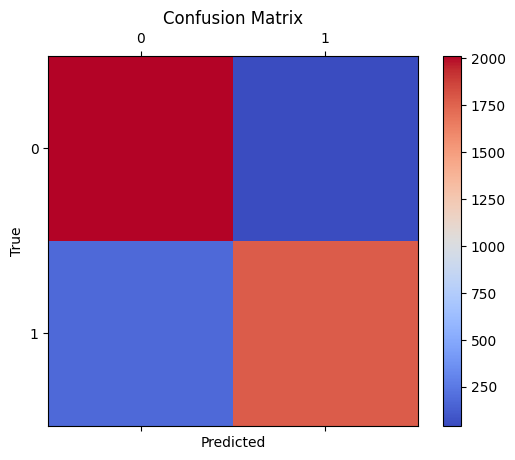

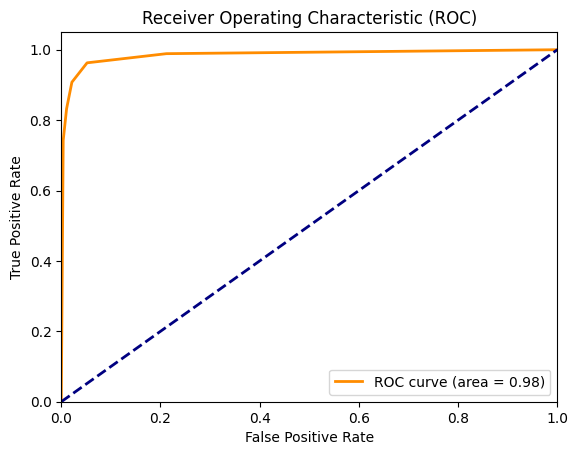

Model and vectorizer saved!


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
import matplotlib.pyplot as plt

# Step 1: Load the datasets
elderly_health_data = pd.read_csv(r'/content/elderly_health_dataset.csv')
emergency_data = pd.read_csv(r'/content/emergency_dataset.csv')

# Step 2: Extract the text and labels from both datasets
elderly_health_texts = elderly_health_data['text'].tolist()
elderly_health_labels = elderly_health_data['label'].tolist()

emergency_texts = emergency_data['text'].tolist()
emergency_labels = emergency_data['label'].tolist()

# Step 3: Combine both datasets
texts = elderly_health_texts + emergency_texts
labels = elderly_health_labels + emergency_labels

# Check class distribution
print("Class distribution (Normal vs Alert):")
print(pd.Series(labels).value_counts())

# Step 4: Text Preprocessing and Vectorization (Using TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Using TF-IDF instead of CountVectorizer
X = vectorizer.fit_transform(texts)  # Transform text data into a matrix of TF-IDF values

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 6: Train K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
knn_model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = knn_model.predict(X_test)

# Predict on training data
y_train_pred = knn_model.predict(X_train)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the accuracy
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


# Step 8: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC-AUC Curve (if binary classification)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plotting Confusion Matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='coolwarm')
fig.colorbar(cax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Step 9: Save Model and Vectorizer
joblib.dump(knn_model, 'knn_alert_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved!")


CountVectorizer

Class distribution (Normal vs Alert):
0    10048
1    10040
Name: count, dtype: int64
Training Accuracy: 0.9874
Accuracy: 0.9853
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2057
           1       0.99      0.98      0.98      1961

    accuracy                           0.99      4018
   macro avg       0.99      0.99      0.99      4018
weighted avg       0.99      0.99      0.99      4018

Confusion Matrix:
[[2041   16]
 [  43 1918]]
ROC-AUC Score: 0.9987


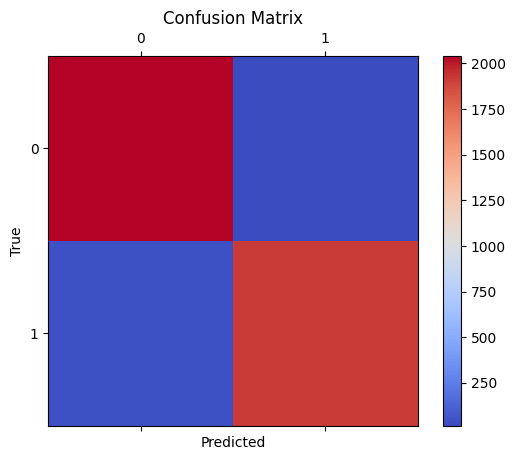

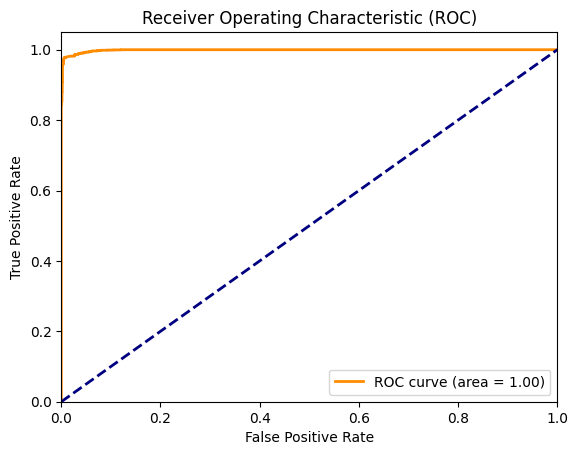

Model and vectorizer saved (CountVectorizer version)!


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Load the datasets
elderly_health_data = pd.read_csv(r'/content/elderly_health_dataset.csv')
emergency_data = pd.read_csv(r'/content/emergency_dataset.csv')

# Step 2: Extract the text and labels from both datasets
elderly_health_texts = elderly_health_data['text'].tolist()
elderly_health_labels = elderly_health_data['label'].tolist()

emergency_texts = emergency_data['text'].tolist()
emergency_labels = emergency_data['label'].tolist()

# Step 3: Combine both datasets
texts = elderly_health_texts + emergency_texts
labels = elderly_health_labels + emergency_labels

# Check class distribution
print("Class distribution (Normal vs Alert):")
print(pd.Series(labels).value_counts())

# Step 4: Text Preprocessing and Vectorization (Using CountVectorizer)
vectorizer = CountVectorizer(stop_words='english', max_features=5000)  # Using Count Vectorizer
X = vectorizer.fit_transform(texts)  # Transform text data into a matrix of token counts

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression classifier
model = LogisticRegression(max_iter=1000, C=1.0, random_state=42)
model.fit(X_train, y_train)

# Calculate Training Accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC-AUC Curve (if binary classification)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plotting Confusion Matrix
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='coolwarm')
fig.colorbar(cax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Step 9: Save Model and Vectorizer
joblib.dump(model, 'alert_model_countvectorizer.pkl')
joblib.dump(vectorizer, 'vectorizer_count.pkl')

print("Model and vectorizer saved (CountVectorizer version)!")
